## Grupo 8

Pablo Martos García

Daniel Vidal de Dompablo

# NUESTRA RED DE NEURONAS ARTIFICIALES MEDIANTES REDES CONVOLUCIONALES

Debemos crear un modelo de Red de Neuronas Artificiales que sea capaz de reconocer y clasificar imágenes de ropa en sus diferentes tipologías. El modelo debe de ser definido, configurado, entrenado, evaluado y mejorado para posteriormente usarlo para hacer **predicciones**.  
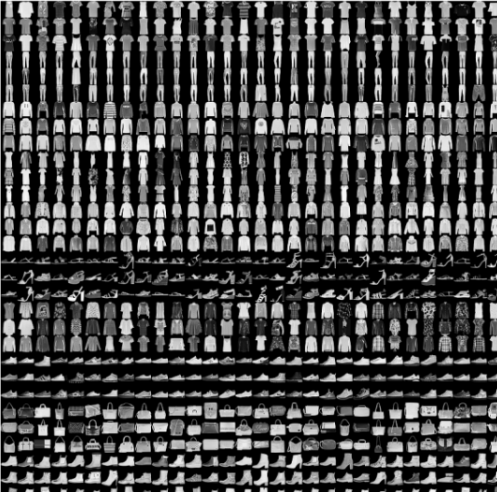


## Introducción

In [ ]:
#Cargamos todas las librerías necesarias y nos aseguramos que estamos ejecutando la versión correcta
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.9.2


#Apartados 1 y 2

In [ ]:
casos = 3
#Presentamos las especificaciones de la primera capa de la red neuronal

filtros_primera_capa_convolucional = [32, 64, 64]
ventana_primera_capa_convolucional = [5, 7, 7]
funcion_activacion_primera_capa = ['relu','relu','relu']
padding_primera_capa =['', 'same', 'same']
ventana_primera_capa_poooling = [2, 2, 2]

#Presentamos las especificaciones de la segunda capa de la red neuronal

filtros_segunda_capa_convolucional = [64, 128, 128]
ventana_segunda_capa_convolucional = [5, 3, 3]
funcion_activacion_segunda_capa = ['relu', 'relu', 'relu']
padding_segunda_capa =['', 'same', 'same']
ventana_segunda_capa_poooling = [2, 2, 2]

#Presentamos las especificaciones de la tercera capa densa de la red neuronal

filtros_penultima_capa_densa = [0, 65, 65]
funcion_activacion_penultima_capa_densa = ['', 'relu', 'relu']

#Presentamos las especificaciones de la cuarta capa densa de la red neuronal

funcion_activacion_ultima_capa_densa = ['softmax', 'softmax' , 'softmax']
optimizador = ['sgd', 'sgd', 'adam']
funcion_perdida = ['sparse_categorical_crossentropy', 
                   'sparse_categorical_crossentropy', 
                   'sparse_categorical_crossentropy']
metrica = ['accuracy', 'accuracy', 'accuracy']
numero_iteraciones = [5, 5, 5]
models = []

In [ ]:
for caso in range(casos):
  model = Sequential()
  if (padding_primera_capa[caso] == ''):
    model.add(Conv2D(filtros_primera_capa_convolucional[caso], 
                    (ventana_primera_capa_convolucional[caso], 
                    ventana_primera_capa_convolucional[caso]), 
                    activation = funcion_activacion_primera_capa[caso], 
                    input_shape=(28, 28, 1)))
  else:
    model.add(Conv2D(filtros_primera_capa_convolucional[caso], 
                    (ventana_primera_capa_convolucional[caso], 
                    ventana_primera_capa_convolucional[caso]), 
                    padding = padding_primera_capa[caso],
                    activation = funcion_activacion_primera_capa[caso], 
                    input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((ventana_primera_capa_poooling[caso], 
                          ventana_primera_capa_poooling[caso])))
  if (padding_segunda_capa[caso] == ''):
    model.add(Conv2D(filtros_segunda_capa_convolucional[caso], 
                    (ventana_segunda_capa_convolucional[caso], 
                   ventana_segunda_capa_convolucional[caso]), 
                    activation=funcion_activacion_segunda_capa[caso]))
  else:
    model.add(Conv2D(filtros_segunda_capa_convolucional[caso], 
                    (ventana_segunda_capa_convolucional[caso], 
                    ventana_segunda_capa_convolucional[caso]),
                    padding = padding_segunda_capa[caso], 
                    activation=funcion_activacion_segunda_capa[caso]))
  model.add(MaxPooling2D((ventana_segunda_capa_poooling[caso], 
                          ventana_segunda_capa_poooling[caso])))
  model.add(Flatten())
  if (filtros_penultima_capa_densa[caso] == 0):
    model.add(Dense(10, activation=funcion_activacion_ultima_capa_densa[caso]))
  else:
    model.add(Dense(filtros_penultima_capa_densa[caso], activation=funcion_activacion_penultima_capa_densa[caso]))
    model.add(Dense(10, activation=funcion_activacion_ultima_capa_densa[caso]))
  models.append(model)

for caso in range(casos):
  print("Caso ",caso)
  models[caso].summary()
  print("\n\n")

Caso  0
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 10)         

Como podemos comprobar en el primer caso recibimos una cantidad de parametros significativamente menor a los otros 2 casos debido a la cantidad de filtros(neuronas) que enccontramos en cada capa.
Sin embargo, a pesar de que encontramos que la segunda y tercera redes neuronales tienen distintos optimizadores eso no afecta a la cantidad de parámetros que recibiremos.

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['Camiseta/Top', 'Pantalones', 'Jersey', 'Vestido', 'Abrigo', 'Sandalia', 'Camisa', 'Deportivas', 'Mochila', 'Botines']

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [ ]:
for caso in range(casos):
  models[caso].compile(loss = funcion_perdida[caso],
              optimizer = optimizador[caso],
              metrics=[metrica[caso]])

In [ ]:
for caso in range(casos):
  print("Caso ",caso)
  models[caso].fit(train_images, train_labels,
          batch_size=100,
          epochs=numero_iteraciones[caso],
          verbose=1)
  print("\n")

Caso  0
Epoch 1/5
600/600 [==============================] - 10s 3ms/step - loss: 1.1963 - accuracy: 0.6112
Epoch 2/5
600/600 [==============================] - 2s 3ms/step - loss: 0.6942 - accuracy: 0.7456
Epoch 3/5
600/600 [==============================] - 2s 3ms/step - loss: 0.5970 - accuracy: 0.7817
Epoch 4/5
600/600 [==============================] - 2s 3ms/step - loss: 0.5448 - accuracy: 0.8023
Epoch 5/5
600/600 [==============================] - 2s 3ms/step - loss: 0.5057 - accuracy: 0.8191


Caso  1
Epoch 1/5
600/600 [==============================] - 4s 6ms/step - loss: 1.0541 - accuracy: 0.6267
Epoch 2/5
600/600 [==============================] - 4s 6ms/step - loss: 0.6550 - accuracy: 0.7600
Epoch 3/5
600/600 [==============================] - 4s 6ms/step - loss: 0.5792 - accuracy: 0.7881
Epoch 4/5
600/600 [==============================] - 4s 6ms/step - loss: 0.5307 - accuracy: 0.8058
Epoch 5/5
600/600 [==============================] - 4s 6ms/step - loss: 0.4920 - accuracy

Podemos comprobar que tanto el primer como segundo caso tienen una precisión y una pérdida muy similares ya que a pesar de que el primero tiene menor número de parámetros debido al número de neuronas esta no cuenta con una capa densa. 

A pesar de que el segundo y tercer caso tenian los mismos números de parámetros, estos tienen un optimizador distinto esto provoca que le sea más facil encontrar los pesos de las aristas mejorando así su precisión y minimizando la pérdida. 

In [ ]:
test_loss = []
test_acc = []
for caso in range(casos):
  test_loss.append(models[caso].evaluate(test_images,  test_labels)[0])
  test_acc.append(models[caso].evaluate(test_images,  test_labels)[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.2483 - accuracy: 0.9135


A pesar de que la tasa de precisión es de un 90% podemos comprobar que esta es más baja que en el entrenamiento debido a que las imágenes que introducimos son nuevas y por ende la red falla más.

# Apartado 5

In [ ]:
print("Precisión obtenida con los datos de pruebas:")
for caso in range(casos):
  print("Caso",caso, test_acc[caso])
print("\n")
print("Pérdida obtenida con los datos de prueba: ")
for caso in range(casos):
  print("Caso",caso, test_loss[caso])

Precisión obtenida con los datos de pruebas:
Caso 0 0.8119999766349792
Caso 1 0.8201000094413757
Caso 2 0.9135000109672546


Pérdida obtenida con los datos de prueba: 
Caso 0 0.5144754648208618
Caso 1 0.5059307813644409
Caso 2 0.24828287959098816


In [ ]:
predictions = []
for caso in range(casos):
  predictions.append(models[caso].predict(test_images))

313/313 [==============================] - 1s 2ms/step


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

In [ ]:
train_images = train_images.reshape((60000, 28, 28))
test_images = test_images.reshape((10000, 28, 28))

# Apartado 6

In [ ]:
def predicciones(numcaso):
  for caso in range(casos):
    print("Predicción del caso 0")
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(numcaso, predictions[caso][numcaso], test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(numcaso, predictions[caso][numcaso],  test_labels)
    plt.show()
    print("\n")

  predicciones(5)

#Apartado 7

Predicción del caso  0


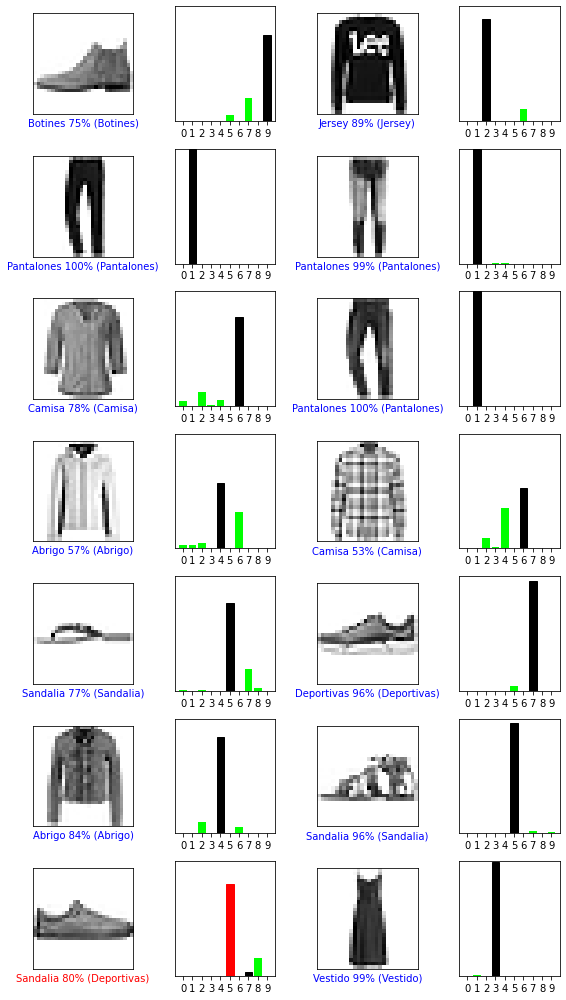




Predicción del caso  1


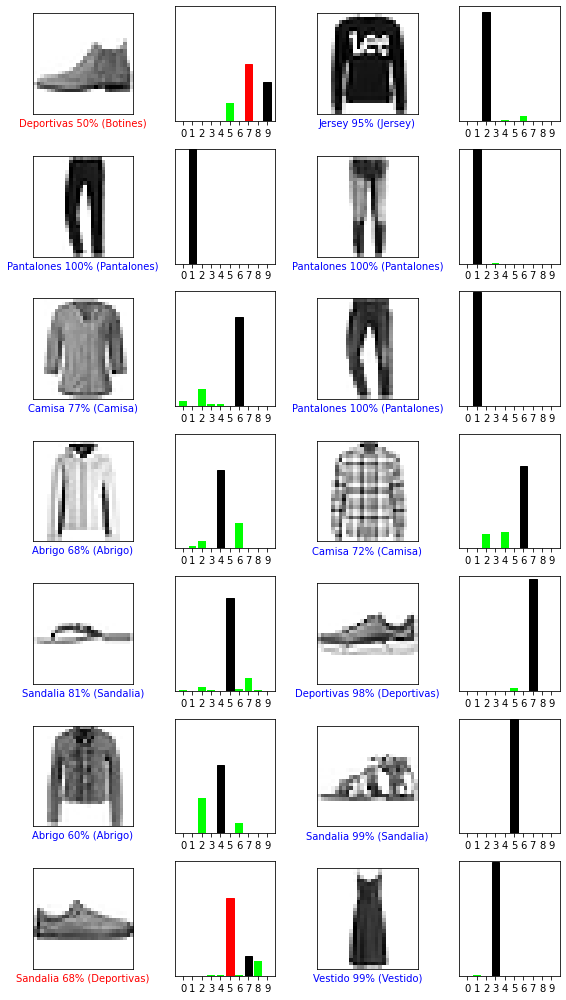




Predicción del caso  2


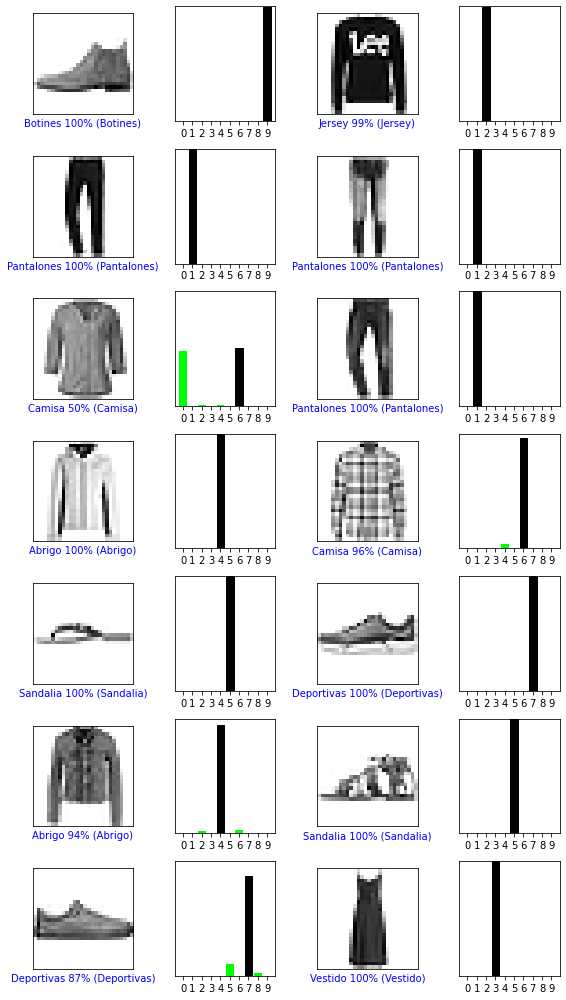

In [ ]:
def primeras_14_predicciones(numfilas, numcolumnas, casos):
  imagenes = numfilas*numcolumnas
  for caso in range(casos):
    print("Predicción del caso ", caso)
    plt.figure(figsize=(2*2*numcolumnas, 2*numfilas))
    for i in range(imagenes):
      plt.subplot(numfilas, 2*numcolumnas, 2*i+1)
      plot_image(i, predictions[caso][i], test_labels, test_images)
      plt.subplot(numfilas, 2*numcolumnas, 2*i+2)     
      plot_value_array(i, predictions[caso][i], test_labels)
    plt.tight_layout()
    plt.show()
    print("\n\n")

primeras_14_predicciones(7,2,casos)

Como podemos comprobar los fallos en las 2 primeras redes neuronales son bastante similares ya que como habíamos dicho previamente la rpecisión de estos 2 casos en prácticamente idéntica. 

En el tercer caso podemos ver que las predicciones de las imagenes son mucho más seguras debido a que la precisión obtenida gracias al optimizador es mayor.

# Apartado 3

In [ ]:
caso4 = 1
#Presentamos las especificaciones de la primera capa de la red neuronal

filtros_primera_capa_convolucional = [32]
ventana_primera_capa_convolucional = [5]
funcion_activacion_primera_capa = ['relu']
padding_primera_capa =['']
ventana_primera_capa_poooling = [2]

#Presentamos las especificaciones de la segunda capa de la red neuronal

filtros_segunda_capa_convolucional = [64]
ventana_segunda_capa_convolucional = [5]
funcion_activacion_segunda_capa = ['relu']
padding_segunda_capa =['']
ventana_segunda_capa_poooling = [2]

#Presentamos las especificaciones de la tercera capa densa de la red neuronal

filtros_penultima_capa_densa = [0]
funcion_activacion_penultima_capa_densa = ['']

#Presentamos las especificaciones de la cuarta capa densa de la red neuronal

funcion_activacion_ultima_capa_densa = ['softmax']
optimizador = ['sgd']
funcion_perdida = ['sparse_categorical_crossentropy']
metrica = ['accuracy']
numero_iteraciones = [25]
models = []

In [ ]:
for caso4 in range(caso4):
  model = Sequential()
  if (padding_primera_capa[caso4] == ''):
    model.add(Conv2D(filtros_primera_capa_convolucional[caso4], 
                    (ventana_primera_capa_convolucional[caso4], 
                    ventana_primera_capa_convolucional[caso4]), 
                    activation = funcion_activacion_primera_capa[caso4], 
                    input_shape=(28, 28, 1)))
  else:
    model.add(Conv2D(filtros_primera_capa_convolucional[caso4], 
                    (ventana_primera_capa_convolucional[caso4], 
                    ventana_primera_capa_convolucional[caso4]), 
                    padding = padding_primera_capa[caso4],
                    activation = funcion_activacion_primera_capa[caso4], 
                    input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((ventana_primera_capa_poooling[caso4], 
                          ventana_primera_capa_poooling[caso4])))
  if (padding_segunda_capa[caso4] == ''):
    model.add(Conv2D(filtros_segunda_capa_convolucional[caso4], 
                    (ventana_segunda_capa_convolucional[caso4], 
                  ventana_segunda_capa_convolucional[caso4]), 
                    activation=funcion_activacion_segunda_capa[caso4]))
  else:
    model.add(Conv2D(filtros_segunda_capa_convolucional[caso4], 
                    (ventana_segunda_capa_convolucional[caso4], 
                    ventana_segunda_capa_convolucional[caso4]),
                    padding = padding_segunda_capa[caso4], 
                    activation=funcion_activacion_segunda_capa[caso4]))
  model.add(MaxPooling2D((ventana_segunda_capa_poooling[caso4], 
                          ventana_segunda_capa_poooling[caso4])))
  model.add(Flatten())
  if (filtros_penultima_capa_densa[caso4] == 0):
    model.add(Dense(10, activation=funcion_activacion_ultima_capa_densa[caso4]))
  else:
    model.add(Dense(filtros_penultima_capa_densa[caso4], activation=funcion_activacion_penultima_capa_densa[caso4]))
    model.add(Dense(10, activation=funcion_activacion_ultima_capa_densa[caso4]))
  models.append(model)


print("Caso 4")
models[caso4].summary()
print("\n\n")

Caso 4
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 10)        

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [ ]:
for caso4 in range(caso4):
  models[caso4].compile(loss = funcion_perdida[caso4],
              optimizer = optimizador[caso4],
              metrics=[metrica[caso4]])

In [ ]:
for caso4 in range(caso4):
  print("Caso ",caso4)
  models[caso4].fit(train_images, train_labels,
          batch_size=100,
          epochs=numero_iteraciones[caso4],
          verbose=1)
  print("\n")

Como podemos ver, a pesar de que la precisión de este es caso es bastante mayor, no es lo esperado tras haber realizado 20 iteraciones mas que su homólogo anterior, sin embargo, la pérdida si que decrece en gran medida respecto al caso 1

#Apartado 4

In [ ]:
caso5 = 1
#Presentamos las especificaciones de la primera capa de la red neuronal

filtros_primera_capa_convolucional = [32]
ventana_primera_capa_convolucional = [5]
funcion_activacion_primera_capa = ['tanh']
padding_primera_capa =['']
ventana_primera_capa_poooling = [2]

#Presentamos las especificaciones de la segunda capa de la red neuronal

filtros_segunda_capa_convolucional = [64]
ventana_segunda_capa_convolucional = [5]
funcion_activacion_segunda_capa = ['tanh']
padding_segunda_capa =['']
ventana_segunda_capa_poooling = [2]

#Presentamos las especificaciones de la tercera capa densa de la red neuronal

filtros_penultima_capa_densa = [0]
funcion_activacion_penultima_capa_densa = ['']

#Presentamos las especificaciones de la cuarta capa densa de la red neuronal

funcion_activacion_ultima_capa_densa = ['softmax']
optimizador = ['sgd']
funcion_perdida = ['sparse_categorical_crossentropy']
metrica = ['accuracy']
numero_iteraciones = [25]
models = []

In [ ]:
for caso5 in range(caso5):
  model = Sequential()
  if (padding_primera_capa[caso5] == ''):
    model.add(Conv2D(filtros_primera_capa_convolucional[caso5], 
                    (ventana_primera_capa_convolucional[caso5], 
                    ventana_primera_capa_convolucional[caso5]), 
                    activation = funcion_activacion_primera_capa[caso5], 
                    input_shape=(28, 28, 1)))
  else:
    model.add(Conv2D(filtros_primera_capa_convolucional[caso5], 
                    (ventana_primera_capa_convolucional[caso5], 
                    ventana_primera_capa_convolucional[caso5]), 
                    padding = padding_primera_capa[caso5],
                    activation = funcion_activacion_primera_capa[caso5], 
                    input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((ventana_primera_capa_poooling[caso5], 
                          ventana_primera_capa_poooling[caso5])))
  if (padding_segunda_capa[caso5] == ''):
    model.add(Conv2D(filtros_segunda_capa_convolucional[caso5], 
                    (ventana_segunda_capa_convolucional[caso5], 
                  ventana_segunda_capa_convolucional[caso5]), 
                    activation=funcion_activacion_segunda_capa[caso5]))
  else:
    model.add(Conv2D(filtros_segunda_capa_convolucional[caso5], 
                    (ventana_segunda_capa_convolucional[caso5], 
                    ventana_segunda_capa_convolucional[caso5]),
                    padding = padding_segunda_capa[caso5], 
                    activation=funcion_activacion_segunda_capa[caso5]))
  model.add(MaxPooling2D((ventana_segunda_capa_poooling[caso5], 
                          ventana_segunda_capa_poooling[caso5])))
  model.add(Flatten())
  if (filtros_penultima_capa_densa[caso5] == 0):
    model.add(Dense(10, activation=funcion_activacion_ultima_capa_densa[caso5]))
  else:
    model.add(Dense(filtros_penultima_capa_densa[caso5], activation=funcion_activacion_penultima_capa_densa[caso5]))
    model.add(Dense(10, activation=funcion_activacion_ultima_capa_densa[caso5]))
  models.append(model)


print("Caso 5")
models[caso5].summary()
print("\n\n")

Caso 5
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 10)        

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [ ]:
for caso5 in range(caso5):
  models[caso5].compile(loss = funcion_perdida[caso5],
              optimizer = optimizador[caso5],
              metrics=[metrica[caso5]])

In [ ]:
for caso5 in range(caso5):
  print("Caso ",caso5)
  models[caso5].fit(train_images, train_labels,
          batch_size=100,
          epochs=numero_iteraciones[caso5],
          verbose=1)
  print("\n")

Como podemos comprobar, tanto la precisión como la pérdida son casi idénticas a las de la primera red neuronal realizada salvo por una leve mejora gracias a la funcion de activación nueva

# Apartado 8

Al mirar la anterior práctica nos damos cuenta de que las predicciones realizadas por los modelos son de media bastante más precisos que las realizadas en con estos modelos.

#Dision de trabajo:

Pablo Martos: creacion de las redes neuronales, estudio de los resultados de las mismas, algoritmo para las predicciones de las redes neuronales, análisis de los resultados obtenidos.

Daniel Vidal: análisis de los resultados de los entrenamientos.